<a href="https://colab.research.google.com/github/AenimaLabs/TelecomX/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##📌 Extracción

In [1]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
datos = requests.get(url).json()

print(f"🔷Datos cargados: {len(datos)} registros")
print("Muestra:", datos[:2])


🔷Datos cargados: 7267 registros
Muestra: [{'customerID': '0002-ORFBO', 'Churn': 'No', 'customer': {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}, 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'}, 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}, 'account': {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}}, {'customerID': '0003-MKNFE', 'Churn': 'No', 'customer': {'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}, 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}, 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}, 'account': {'Contract': 'Month-to-month

##🔧 Transformación

###Conocer el conjunto de datos:


In [2]:
df = pd.json_normalize(datos)  # ← Aplanado automático

display(df.head())

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [3]:
df.columns = df.columns.str.replace('.', '_', regex=False) #reemplaza los puntos por guiones

print("Nombres de columnas actualizados:")
print(df.columns.tolist())
# Mostrar las primeras filas
print("\n🔷 Primeras 5 filas del dataset:")
display(df.head())

Nombres de columnas actualizados:
['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total']

🔷 Primeras 5 filas del dataset:


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
# Dimensiones del dataset
print(f"🔷 Forma del dataset: {df.shape}")

🔷 Forma del dataset: (7267, 21)


In [5]:
# Mostrar resumen general del DataFrame
print("🔷 Información general del dataset:")
print(df.info())

🔷 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_Tech

In [6]:
# Mostrar los tipos de datos por columna
print("\n🔷 Tipos de datos de cada columna:")
print(df.dtypes)


🔷 Tipos de datos de cada columna:
customerID                    object
Churn                         object
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner              object
customer_Dependents           object
customer_tenure                int64
phone_PhoneService            object
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling      object
account_PaymentMethod         object
account_Charges_Monthly      float64
account_Charges_Total         object
dtype: object


* **Llama la atención que account_Charges_Total sea del tipo object, debería ser numérico**

### Comprobación de incoherencias en los datos y manejo de inconsistencias

In [7]:
# Convertir a numérico, forzando errores a NaN
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

# Verificar si ahora es float64
print(df['account_Charges_Total'].dtype)  # Debe decir: float64

float64


In [8]:
print(f"🔷Cantidad de valores nulos por columna:\n{df.isnull().sum()}") #total de valores nulos

🔷Cantidad de valores nulos por columna:
customerID                    0
Churn                         0
customer_gender               0
customer_SeniorCitizen        0
customer_Partner              0
customer_Dependents           0
customer_tenure               0
phone_PhoneService            0
phone_MultipleLines           0
internet_InternetService      0
internet_OnlineSecurity       0
internet_OnlineBackup         0
internet_DeviceProtection     0
internet_TechSupport          0
internet_StreamingTV          0
internet_StreamingMovies      0
account_Contract              0
account_PaperlessBilling      0
account_PaymentMethod         0
account_Charges_Monthly       0
account_Charges_Total        11
dtype: int64


In [9]:
# Filtrar y mostrar solo las filas donde 'account_Charges_Total' es nulo
nulos_total = df[df['account_Charges_Total'].isnull()]

# Mostrar columnas relevantes para analizar el contexto
print("🔷 Filas con account_Charges_Total nulo:")
display(nulos_total[[
    'customerID',
    'customer_tenure',
    'account_Charges_Monthly',
    'Churn',
    'account_Contract',
    'account_Charges_Total'
]].reset_index(drop=True))

🔷 Filas con account_Charges_Total nulo:


,customerID,customer_tenure,account_Charges_Monthly,Churn,account_Contract,account_Charges_Total
0,1371-DWPAZ,0,56.05,No,Two year,NaN
1,2520-SGTTA,0,20.00,No,Two year,NaN
2,2775-SEFEE,0,61.90,No,Two year,NaN
3,2923-ARZLG,0,19.70,No,One year,NaN
4,3115-CZMZD,0,20.25,No,Two year,NaN
5,3213-VVOLG,0,25.35,No,Two year,NaN
6,4075-WKNIU,0,73.35,No,Two year,NaN
7,4367-NUYAO,0,25.75,No,Two year,NaN
8,4472-LVYGI,0,52.55,No,Two year,NaN
9,5709-LVOEQ,0,80.85,No,Two year,NaN


* todos los clientes tienen ternure = 0 (recién registrados)
* todos tienen una cuota mensual
* churn = no  (ninguno ha abandonado, ya que acaban de empezar)
* contratos de uno o dos años

Lo anterior nos hace pensar que a estos clientes aún no se les ha registrado el cargo total ya sea porque el sistema no ha registrado el mes completo, o el campo se dejó vacío porque ternure = 0

Total = Monthly × Tenure = Monthly × 0 = 0

Sería completamente válido reemplazar estos nulos por 0.




In [10]:
# Imputar con 0 donde tenure = 0 y Total es nulo
df.loc[
    (df['account_Charges_Total'].isnull()) & (df['customer_tenure'] == 0),
    'account_Charges_Total'
] = 0

# Verificar que ya no hay nulos
print(f"🔷Valores nulos restantes en account_Charges_Total: {df['account_Charges_Total'].isnull().sum()}")

🔷Valores nulos restantes en account_Charges_Total: 0


In [11]:
print(f"🔷Cantidad de valores duplicados: {df.duplicated().sum()}") #valores duplicados

🔷Cantidad de valores duplicados: 0


In [12]:
# Verifique si hay valores únicos en cada columna
for col in df.columns:
  print(f"🔷Valores únicos en la columna'{col}': {df[col].nunique()}")
  if df[col].nunique() < 50: # Imprima los valores solamente si no hay muchos
    print(df[col].unique())
    print('-' * 50)  # Línea divisoria para mejor visualización

🔷Valores únicos en la columna'customerID': 7267
🔷Valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
🔷Valores únicos en la columna'customer_gender': 2
['Female' 'Male']
--------------------------------------------------
🔷Valores únicos en la columna'customer_SeniorCitizen': 2
[0 1]
--------------------------------------------------
🔷Valores únicos en la columna'customer_Partner': 2
['Yes' 'No']
--------------------------------------------------
🔷Valores únicos en la columna'customer_Dependents': 2
['Yes' 'No']
--------------------------------------------------
🔷Valores únicos en la columna'customer_tenure': 73
🔷Valores únicos en la columna'phone_PhoneService': 2
['Yes' 'No']
--------------------------------------------------
🔷Valores únicos en la columna'phone_MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
🔷Valores únicos en la columna'internet_InternetService': 3
['DSL' 'Fiber o

🔷Valores únicos en la columna'Churn': 3

[ 'No'  'Yes'  '' ]

Acá se presenta otro inconveniente.



In [13]:
df = df[df['Churn'].str.strip() != '']
print("🔷Número de filas después de eliminar las vacías en 'Churn':", len(df))

🔷Número de filas después de eliminar las vacías en 'Churn': 7043


In [14]:
df['Churn'].unique() #comprobando los valores únicos de la columna Churn

array(['No', 'Yes'], dtype=object)

In [15]:
(df['account_Charges_Monthly'] < 0).sum()  # Debe ser 0

np.int64(0)

In [16]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum() #otra foma de buscar '' en todo el dataframe

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [17]:
# Columnas categóricas clave
cat_cols = [
    'Churn',
    'customer_gender',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_Contract',
    'account_PaperlessBilling',
    'account_PaymentMethod'
]

print("\n🔷 Valores únicos por columna categórica:")
for col in cat_cols:
    if col in df.columns:
        unique_vals = pd.unique(df[col].dropna())  # excluir NaN
        print(f"{col}: {sorted(unique_vals)}")


🔷 Valores únicos por columna categórica:
Churn: ['No', 'Yes']
customer_gender: ['Female', 'Male']
customer_Partner: ['No', 'Yes']
customer_Dependents: ['No', 'Yes']
phone_PhoneService: ['No', 'Yes']
phone_MultipleLines: ['No', 'No phone service', 'Yes']
internet_InternetService: ['DSL', 'Fiber optic', 'No']
internet_OnlineSecurity: ['No', 'No internet service', 'Yes']
internet_OnlineBackup: ['No', 'No internet service', 'Yes']
internet_DeviceProtection: ['No', 'No internet service', 'Yes']
internet_TechSupport: ['No', 'No internet service', 'Yes']
internet_StreamingTV: ['No', 'No internet service', 'Yes']
internet_StreamingMovies: ['No', 'No internet service', 'Yes']
account_Contract: ['Month-to-month', 'One year', 'Two year']
account_PaperlessBilling: ['No', 'Yes']
account_PaymentMethod: ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']


### Columna de cuentas diarias



In [18]:
# Calcular el cargo diario promedio
df['Cuentas_Diarias'] = df['account_Charges_Monthly'] / 30

# Redondear a 2 decimales para mejor lectura
df['Cuentas_Diarias'] = df['Cuentas_Diarias'].round(2)

# Verificar
print("🔷 Primeras filas con la nueva columna:")
print(df[['account_Charges_Monthly', 'Cuentas_Diarias']].head())

🔷 Primeras filas con la nueva columna:
   account_Charges_Monthly  Cuentas_Diarias
0                     65.6             2.19
1                     59.9             2.00
2                     73.9             2.46
3                     98.0             3.27
4                     83.9             2.80


In [19]:
# Resumen general
print("🔷 Estadísticas de Cuentas_Diarias (general):")
print(df['Cuentas_Diarias'].describe())

# Por grupo de Churn
print("\n🔷 Cuentas_Diarias promedio por Churn:")
print(df.groupby('Churn')['Cuentas_Diarias'].mean().round(2))

🔷 Estadísticas de Cuentas_Diarias (general):
count    7043.000000
mean        2.158675
std         1.003088
min         0.610000
25%         1.180000
50%         2.340000
75%         2.990000
max         3.960000
Name: Cuentas_Diarias, dtype: float64

🔷 Cuentas_Diarias promedio por Churn:
Churn
No     2.04
Yes    2.48
Name: Cuentas_Diarias, dtype: float64


### Estandarización y transformación de datos

In [20]:
yes_no_cols = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling'
]

# Mapeo más explícito (recomendado)
mapping = {
    'Yes': 1,
    'No': 0,
    'No phone service': 0,
    'No internet service': 0
}

for col in yes_no_cols:
    df[col] = df[col].map(mapping).astype(int)

# Verificar
print("Valores únicos en Churn:", df['Churn'].unique())  # [0 1]
print("Tipos de datos:", df[yes_no_cols].dtypes)

Valores únicos en Churn: [0 1]
Tipos de datos: Churn                        int64
customer_Partner             int64
customer_Dependents          int64
phone_PhoneService           int64
phone_MultipleLines          int64
internet_OnlineSecurity      int64
internet_OnlineBackup        int64
internet_DeviceProtection    int64
internet_TechSupport         int64
internet_StreamingTV         int64
internet_StreamingMovies     int64
account_PaperlessBilling     int64
dtype: object


In [21]:
df = df.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Abandono',
    'customer_gender': 'Genero',
    'customer_SeniorCitizen': 'Adulto_Mayor',
    'customer_Partner': 'Tiene_Pareja',
    'customer_Dependents': 'Tiene_Dependientes',
    'customer_tenure': 'Meses_Contrato',
    'phone_PhoneService': 'Servicio_Telefonico',
    'phone_MultipleLines': 'Multiples_Lineas',
    'internet_InternetService': 'Servicio_Internet',
    'internet_OnlineSecurity': 'Seguridad_Online',
    'internet_OnlineBackup': 'Respaldo_Online',
    'internet_DeviceProtection': 'Proteccion_Dispositivo',
    'internet_TechSupport': 'Soporte_Tecnico',
    'internet_StreamingTV': 'Streaming_TV',
    'internet_StreamingMovies': 'Streaming_Peliculas',
    'account_Contract': 'Tipo_Contrato',
    'account_PaperlessBilling': 'Factura_Electronica',
    'account_PaymentMethod': 'Metodo_Pago',
    'account_Charges_Monthly': 'Cargo_Mensual',
    'account_Charges_Total': 'Cargo_Total',
    'Cuentas_Diarias': 'Cargo_Diario'
})

In [22]:
# Ejemplo: Traducir tipo de contrato
contrato_map = {
    'Month-to-month': 'Mes a mes',
    'One year': 'Un año',
    'Two year': 'Dos años'
}
df['Tipo_Contrato'] = df['Tipo_Contrato'].map(contrato_map)

# Servicio de internet
internet_map = {
    'Fiber optic': 'Fibra Óptica',
    'DSL': 'DSL',
    'No': 'Sin Internet'
}
df['Servicio_Internet'] = df['Servicio_Internet'].map(internet_map)

# Método de pago (opcional)
pago_map = {
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque por correo',
    'Bank transfer (automatic)': 'Transferencia bancaria',
    'Credit card (automatic)': 'Tarjeta de crédito'
}
df['Metodo_Pago'] = df['Metodo_Pago'].map(pago_map)

#Genero
genero_map = {
    'Female': 'Femenino',
    'Male': 'Masculino'
}
df['Genero'] = df['Genero'].map(genero_map)

In [23]:
display(df.head())

,ID_Cliente,Abandono,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,0,1,1,0,Un año,1,Cheque por correo,65.6,593.30,2.19
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mes a mes,0,Cheque por correo,59.9,542.40,2.00
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra Óptica,...,1,0,0,0,Mes a mes,1,Cheque electrónico,73.9,280.85,2.46
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra Óptica,...,1,0,1,1,Mes a mes,1,Cheque electrónico,98.0,1237.85,3.27
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fibra Óptica,...,0,1,1,0,Mes a mes,1,Cheque por correo,83.9,267.40,2.80


In [24]:
df.shape

(7043, 22)

In [25]:
# Verificar que no hay duplicados
assert not df['ID_Cliente'].duplicated().any(), "Hay ID_Cliente duplicados"

# Establecer como índice
df = df.set_index('ID_Cliente')

print(f"DataFrame con índice personalizado: {df.index.name}")


DataFrame con índice personalizado: ID_Cliente


In [26]:
display(df.head())

,Abandono,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,Seguridad_Online,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario
ID_Cliente,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,0,...,0,1,1,0,Un año,1,Cheque por correo,65.6,593.30,2.19
0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Mes a mes,0,Cheque por correo,59.9,542.40,2.00
0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra Óptica,0,...,1,0,0,0,Mes a mes,1,Cheque electrónico,73.9,280.85,2.46
0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra Óptica,0,...,1,0,1,1,Mes a mes,1,Cheque electrónico,98.0,1237.85,3.27
0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fibra Óptica,0,...,0,1,1,0,Mes a mes,1,Cheque por correo,83.9,267.40,2.80


##📊 Carga y análisis

###Análisis Descriptivo

In [27]:
print("🔷 RESUMEN ESTADÍSTICO DE VARIABLES NUMÉRICAS")
df.describe().T

🔷 RESUMEN ESTADÍSTICO DE VARIABLES NUMÉRICAS


,count,mean,std,min,25%,50%,75%,max
Abandono,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00
Adulto_Mayor,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
Tiene_Pareja,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
Tiene_Dependientes,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
Meses_Contrato,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
Servicio_Telefonico,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
Multiples_Lineas,7043.0,0.421837,0.493888,0.00,0.00,0.00,1.00,1.00
Seguridad_Online,7043.0,0.286668,0.452237,0.00,0.00,0.00,1.00,1.00
Respaldo_Online,7043.0,0.344881,0.475363,0.00,0.00,0.00,1.00,1.00
Proteccion_Dispositivo,7043.0,0.343888,0.475038,0.00,0.00,0.00,1.00,1.00


In [28]:
display(df.head())

,Abandono,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,Seguridad_Online,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario
ID_Cliente,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,0,...,0,1,1,0,Un año,1,Cheque por correo,65.6,593.30,2.19
0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Mes a mes,0,Cheque por correo,59.9,542.40,2.00
0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra Óptica,0,...,1,0,0,0,Mes a mes,1,Cheque electrónico,73.9,280.85,2.46
0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra Óptica,0,...,1,0,1,1,Mes a mes,1,Cheque electrónico,98.0,1237.85,3.27
0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fibra Óptica,0,...,0,1,1,0,Mes a mes,1,Cheque por correo,83.9,267.40,2.80


In [29]:
print("\n🔷 RESUMEN DE VARIABLES CATEGÓRICAS")
categorical_cols = [
    'Genero', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes',
    'Servicio_Telefonico', 'Multiples_Lineas', 'Servicio_Internet',
    'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
    'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas',
    'Tipo_Contrato', 'Factura_Electronica', 'Metodo_Pago', 'Abandono'
]

for col in categorical_cols:
    print(f"\n👉 {col}:")
    print(df[col].value_counts().sort_index())


🔷 RESUMEN DE VARIABLES CATEGÓRICAS

👉 Genero:
Genero
Femenino     3488
Masculino    3555
Name: count, dtype: int64

👉 Adulto_Mayor:
Adulto_Mayor
0    5901
1    1142
Name: count, dtype: int64

👉 Tiene_Pareja:
Tiene_Pareja
0    3641
1    3402
Name: count, dtype: int64

👉 Tiene_Dependientes:
Tiene_Dependientes
0    4933
1    2110
Name: count, dtype: int64

👉 Servicio_Telefonico:
Servicio_Telefonico
0     682
1    6361
Name: count, dtype: int64

👉 Multiples_Lineas:
Multiples_Lineas
0    4072
1    2971
Name: count, dtype: int64

👉 Servicio_Internet:
Servicio_Internet
DSL             2421
Fibra Óptica    3096
Sin Internet    1526
Name: count, dtype: int64

👉 Seguridad_Online:
Seguridad_Online
0    5024
1    2019
Name: count, dtype: int64

👉 Respaldo_Online:
Respaldo_Online
0    4614
1    2429
Name: count, dtype: int64

👉 Proteccion_Dispositivo:
Proteccion_Dispositivo
0    4621
1    2422
Name: count, dtype: int64

👉 Soporte_Tecnico:
Soporte_Tecnico
0    4999
1    2044
Name: count, dtype: int

In [31]:
print("\n🔷 MÉTRICAS ADICIONALES")
print(f"Total de clientes: {len(df)}")
print(f"Tasa de abandono: {df['Abandono'].mean():.2%}")
print(f"Promedio de meses como cliente: {df['Meses_Contrato'].mean():.1f}")
print(f"Promedio de cargo mensual: ${df['Cargo_Mensual'].mean():.2f}")
print(f"Promedio de cargo diario: ${df['Cargo_Diario'].mean():.2f}")

# Mediana (más robusta que la media si hay outliers)
print(f"Mediana de tenure: {df['Meses_Contrato'].median()} meses")
print(f"Mediana de cargo mensual: ${df['Cargo_Mensual'].median():.2f}")


🔷 MÉTRICAS ADICIONALES
Total de clientes: 7043
Tasa de abandono: 26.54%
Promedio de meses como cliente: 32.4
Promedio de cargo mensual: $64.76
Promedio de cargo diario: $2.16
Mediana de tenure: 29.0 meses
Mediana de cargo mensual: $70.35


In [32]:
print("\n🔷 TASA DE CHURN POR VARIABLES CLAVE")

# Por Adulto_Mayor
print("\n👉 Adulto_Mayor:")
print(df.groupby('Adulto_Mayor')['Abandono'].mean().map('{:.2%}'.format))

# Por Tipo_Contrato
print("\n👉 Tipo_Contrato:")
print(df.groupby('Tipo_Contrato')['Abandono'].mean().map('{:.2%}'.format))

# Por Servicio_Internet
print("\n👉 Servicio_Internet:")
print(df.groupby('Servicio_Internet')['Abandono'].mean().map('{:.2%}'.format))

# Por Metodo_Pago
print("\n👉 Metodo_Pago:")
print(df.groupby('Metodo_Pago')['Abandono'].mean().map('{:.2%}'.format))


🔷 TASA DE CHURN POR VARIABLES CLAVE

👉 Adulto_Mayor:
Adulto_Mayor
0    23.61%
1    41.68%
Name: Abandono, dtype: object

👉 Tipo_Contrato:
Tipo_Contrato
Dos años      2.83%
Mes a mes    42.71%
Un año       11.27%
Name: Abandono, dtype: object

👉 Servicio_Internet:
Servicio_Internet
DSL             18.96%
Fibra Óptica    41.89%
Sin Internet     7.40%
Name: Abandono, dtype: object

👉 Metodo_Pago:
Metodo_Pago
Cheque electrónico        45.29%
Cheque por correo         19.11%
Tarjeta de crédito        15.24%
Transferencia bancaria    16.71%
Name: Abandono, dtype: object


In [33]:
print("\n🔷 Correlación con Abandono (r de Pearson)")
numeric_for_corr = [
    'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes',
    'Servicio_Telefonico', 'Multiples_Lineas',
    'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
    'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas',
    'Factura_Electronica', 'Meses_Contrato', 'Cargo_Mensual', 'Cargo_Diario'
]

correlations = df[numeric_for_corr + ['Abandono']].corr()['Abandono'].drop('Abandono').sort_values(ascending=False)
print(correlations.map('{:.3f}'.format))


🔷 Correlación con Abandono (r de Pearson)
Cargo_Diario               0.193
Cargo_Mensual              0.193
Factura_Electronica        0.192
Adulto_Mayor               0.151
Streaming_TV               0.063
Streaming_Peliculas        0.061
Multiples_Lineas           0.040
Servicio_Telefonico        0.012
Proteccion_Dispositivo    -0.066
Respaldo_Online           -0.082
Tiene_Pareja              -0.150
Tiene_Dependientes        -0.164
Soporte_Tecnico           -0.165
Seguridad_Online          -0.171
Meses_Contrato            -0.352
Name: Abandono, dtype: object


###Distribución de evasión

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración básica de estilo
plt.style.use('default')  # Puedes usar 'seaborn' si prefieres
sns.set_palette("husl")

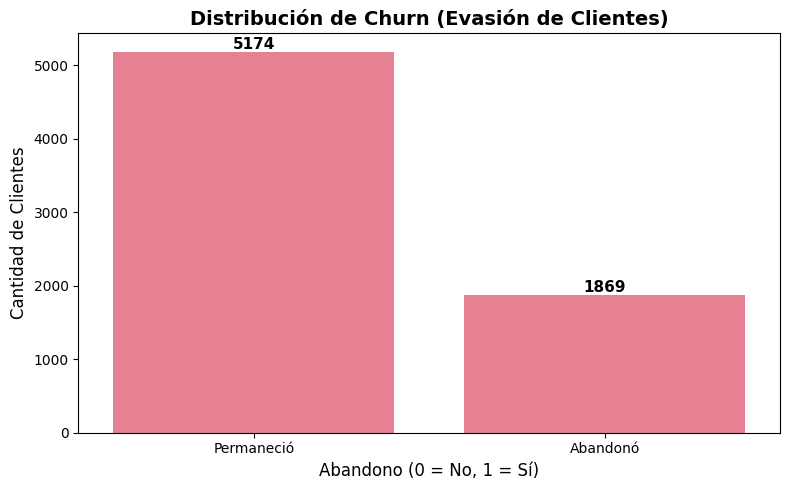

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Abandono')
plt.title('Distribución de Churn (Evasión de Clientes)', fontsize=14, fontweight='bold')
plt.xlabel('Abandono (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks([0, 1], ['Permaneció', 'Abandonó'])

# Añadir etiquetas de valor encima de las barras
for i, count in enumerate(df['Abandono'].value_counts().sort_index()):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

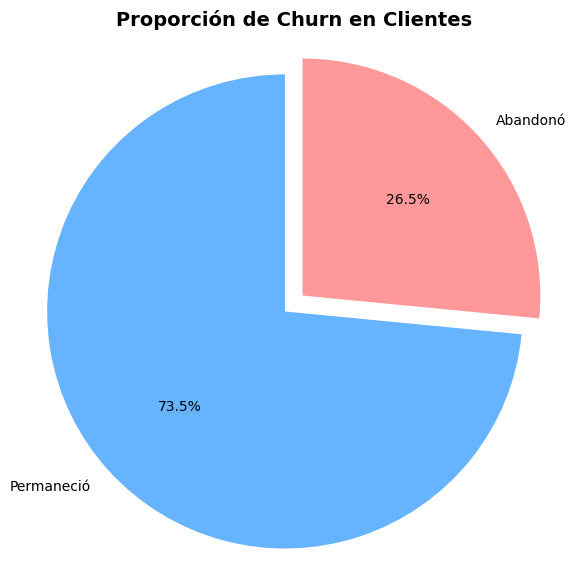

In [36]:
plt.figure(figsize=(7, 7))
labels = ['Permaneció', 'Abandonó']
sizes = df['Abandono'].value_counts().sort_index()
colors = ['#66b3ff', '#ff9999']
explode = (0, 0.1)  # Destacar el grupo de "Abandonó"

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Proporción de Churn en Clientes', fontsize=14, fontweight='bold')
plt.axis('equal')  # Para que el pastel sea circular
plt.show()

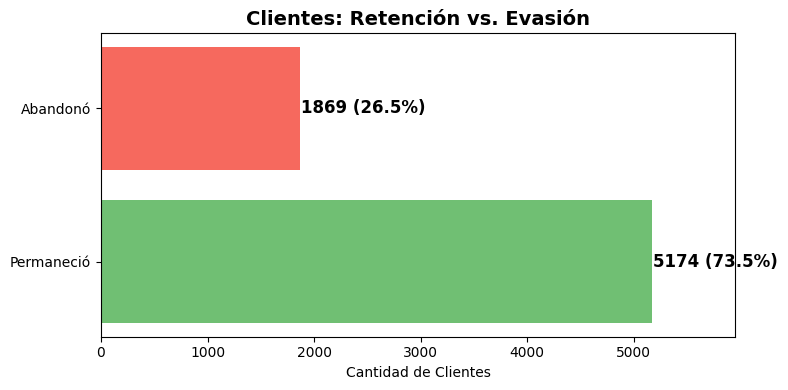

In [37]:
# Calcular porcentajes
churn_counts = df['Abandono'].value_counts().sort_index()
churn_percentages = df['Abandono'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(8, 4))
bars = plt.barh(['Permaneció', 'Abandonó'], churn_counts, color=['#4CAF50', '#F44336'], alpha=0.8)

# Añadir porcentajes dentro de las barras
for i, (count, pct) in enumerate(zip(churn_counts, churn_percentages)):
    plt.text(count + 10, i, f'{count} ({pct:.1f}%)', va='center', fontsize=12, fontweight='bold')

plt.title('Clientes: Retención vs. Evasión', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de Clientes')
plt.xlim(0, max(churn_counts) * 1.15)  # Espacio para el texto
plt.tight_layout()
plt.show()

##📄 Informe final